# Prediksi Median House Value di California

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

**Context**

Dataset yang digunakan berasal dari sensus California tahun 1990, yang meskipun tidak relevan untuk memprediksi harga rumah saat ini, tetap menjadi dataset yang ideal untuk memahami dasar-dasar machine learning. Data ini mencakup informasi seperti lokasi geografis, jumlah kamar, populasi, dan tingkat pendapatan penduduk, yang memengaruhi nilai properti perumahan. Penentuan harga rumah merupakan tantangan penting, di mana pembeli mencari nilai yang adil, dan penjual ingin memastikan harga optimal berdasarkan berbagai faktor.

Dengan menggunakan machine learning, kita dapat mempelajari pola dan hubungan antara fitur yang kompleks secara lebih efisien dibandingkan metode manual. Pendekatan berbasis data ini memungkinkan analisis skala besar, memberikan wawasan akurat, dan membantu mempersiapkan pengaplikasian teknik prediksi untuk data masa kini. Proyek ini dirancang untuk memberikan pemahaman praktis tentang machine learning sambil mengeksplorasi dinamika historis pasar perumahan.

**Problem Statement**

Salah satu tantangan utama dalam pasar perumahan adalah menentukan harga rumah yang optimal berdasarkan berbagai faktor seperti lokasi, jumlah kamar, populasi, dan pendapatan median. Harga yang terlalu tinggi dapat mengurangi minat pembeli, sedangkan harga yang terlalu rendah dapat menyebabkan kerugian finansial bagi penjual atau pengembang properti.

Mengingat banyaknya variabel yang memengaruhi nilai properti, pendekatan manual atau berbasis intuisi sering kali tidak cukup akurat untuk mencerminkan nilai sebenarnya. Oleh karena itu, diperlukan model prediksi yang berbasis data untuk membantu berbagai pihak, baik penjual maupun pembeli, dalam menentukan harga rumah yang kompetitif sekaligus menguntungkan.

**Goals**

Berdasarkan permasalahan tersebut, tujuan utama dari proyek ini adalah tools yang dapat memprediksi kisaran nilai rumah secara presisi dan akurat. Tool ini diharapkan mampu memanfaatkan berbagai fitur seperti jumlah kamar, lokasi, populasi, dan pendapatan median untuk menghasilkan prediksi yang mendekati nilai sebenarnya. Dengan prediksi yang lebih akurat, penjual dapat menentukan harga yang optimal untuk rumah mereka, sehingga tetap kompetitif di pasar dan menguntungkan.

Bagi pengembang properti dan pembeli, model ini dapat menjadi alat bantu yang sangat berharga untuk memahami faktor-faktor yang memengaruhi nilai properti. Selain itu, model ini diharapkan dapat meningkatkan efisiensi dalam proses penilaian properti, mengurangi ketergantungan pada intuisi atau metode manual, serta mendukung pengambilan keputusan berbasis data yang lebih baik.

**Analytic Approach**

Yang perlu kita lakukan adalah menganalisis data untuk menemukan pola dan hubungan antara fitur-fitur seperti lokasi, jumlah kamar, populasi, dan pendapatan median yang memengaruhi nilai rumah. Analisis ini akan membantu kita memahami faktor-faktor utama yang berkontribusi terhadap variasi harga properti.

Selanjutnya, kita akan membangun model regresi menggunakan machine learning untuk memprediksi harga rumah secara akurat. Model ini akan menjadi alat bantu bagi penjual atau pengembang properti dalam menentukan kisaran harga yang optimal, sehingga dapat meningkatkan daya saing di pasar sekaligus memaksimalkan keuntungan.


**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah MAE, MedAE, dan R-squared. MAE (Mean Absolute Error) adalah rata-rata dari nilai absolut error, yang menunjukkan seberapa jauh prediksi model dari nilai sebenarnya. MedAE (Median Absolute Error) adalah nilai tengah dari error absolut, yang memberikan gambaran robust terhadap outlier. Sedangkan R-squared digunakan untuk mengevaluasi seberapa baik model dapat menjelaskan varians dari data. Semakin tinggi nilai R-squared, semakin baik model dalam merepresentasikan data.

Semakin kecil nilai MAE dan MedAE yang dihasilkan oleh model, semakin akurat prediksi harga rumah yang diberikan. Dengan menggunakan metrik-metrik ini, kita dapat mengevaluasi performa model secara menyeluruh dan memilih model terbaik yang mampu memprediksi harga rumah dengan presisi tinggi.

### Data Understanding

- Dataset ini merupakan data sensus California pada tahun 1990.
- Setiap baris data merepresentasikan informasi terkait karakteristik demografis dan properti di wilayah California, seperti lokasi geografis, jumlah kamar, populasi, dan tingkat pendapatan median penduduk.

**Attributes Information**

| **Nama Kolom** | **Tipe Data** | **Jumlah Data Tidak Null** | **Jumlah Nilai Uniq** | **Deskripsi** |
| --- | --- | --- | --- | --- |
| longitude | float64 | 14448 | 806 | Koordinat geografis (bujur) lokasi properti. |
| latitude | float64 | 14448 | 836 | Koordinat geografis (lintang) lokasi properti. |
| housing_median_age | float64 | 14448 | 52 | Usia rata-rata bangunan perumahan di area tersebut (tahun). |
| total_rooms | float64 | 14448 | 5227 | Jumlah total kamar di semua perumahan dalam area tersebut. |
| total_bedrooms | float64 | 14311 | 1748 | Jumlah total kamar tidur di semua perumahan dalam area tersebut. |
| population | float64 | 14448 | 3498 | Jumlah total penduduk yang tinggal di area tersebut. |
| households | float64 | 14448 | 1649 | Jumlah total rumah tangga yang tinggal di area tersebut. |
| median_income | float64 | 14448 | 9797 | Pendapatan rata-rata per rumah tangga dalam area tersebut (dalam ribu USD). |
| ocean_proximity | object | 14448 | 5 | Kategori yang menggambarkan kedekatan area terhadap laut (contoh: "NEAR BAY", "INLAND"). |
| median_house_value | float64 | 14448 | 3548 | Nilai rata-rata rumah dalam area tersebut (dalam USD). |

<br>

In [694]:
import pandas as pd
import numpy as np

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [695]:
df = pd. read_csv('data_california_house.csv')

In [696]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Total baris di dataset ini adalah 14.448, dan jumlah fitur nya sendiri ada 10, fitur target atau fitur yang akan kita prediksi adalah `meadian_house_value`, terdapat missing value pada fitur `total_bedrooms`

In [698]:
df.describe(include=object)

,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


In [745]:
df.duplicated().value_counts()

False    14448
Name: count, dtype: int64

Tidak ada duplikasi data.

In [699]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14311.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,-119.566647,35.630093,28.618702,2640.132683,538.260709,1425.157323,499.508929,3.866667,206824.624516
std,2.006587,2.140121,12.596694,2191.612441,423.577544,1149.580157,383.098390,1.891158,115365.476182
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1451.000000,295.000000,784.000000,279.000000,2.570600,119600.000000
50%,-118.490000,34.260000,29.000000,2125.000000,435.000000,1165.000000,410.000000,3.539100,180000.000000
75%,-118.000000,37.710000,37.000000,3148.000000,647.000000,1724.000000,604.000000,4.736100,263900.000000
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


- <1H OCEAN adalah kategori dominan di dataset ini, mewakili hampir 44% dari total data.
- `median_income` menunjukkan pendapatan dalam ribuan dolar.
- `median_house_value` dengan nilai berkisar antara 14.999 hingga 500.001 dolar.
- Beberapa fitur seperti population, total_rooms, dan median_income memiliki rentang nilai yang cukup besar, menunjukkan adanya skewness pada distribusi datanya.

In [700]:
# Membuat data unik di tiap kolom, ditambah tipe data
listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].dropna().unique()[:10].tolist(), df[col].dtype])  # Menambahkan tipe data

# Membuat DataFrame deskripsi dengan tipe data
tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample', 'Data Type'],
                          data=listItem)

# Menampilkan DataFrame
tabel1Desc

,Column Name,Number of Unique,Unique Sample,Data Type
0,longitude,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ...",float64
1,latitude,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6...",float64
2,housing_median_age,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0...",float64
3,total_rooms,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0...",float64
4,total_bedrooms,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14...",float64
5,population,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ...",float64
6,households,1649,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14...",float64
7,median_income,9797,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8...",float64
8,ocean_proximity,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]",object
9,median_house_value,3548,"[47500.0, 100000.0, 285800.0, 175000.0, 59200....",float64


**Distribusi Fitur Numerik**

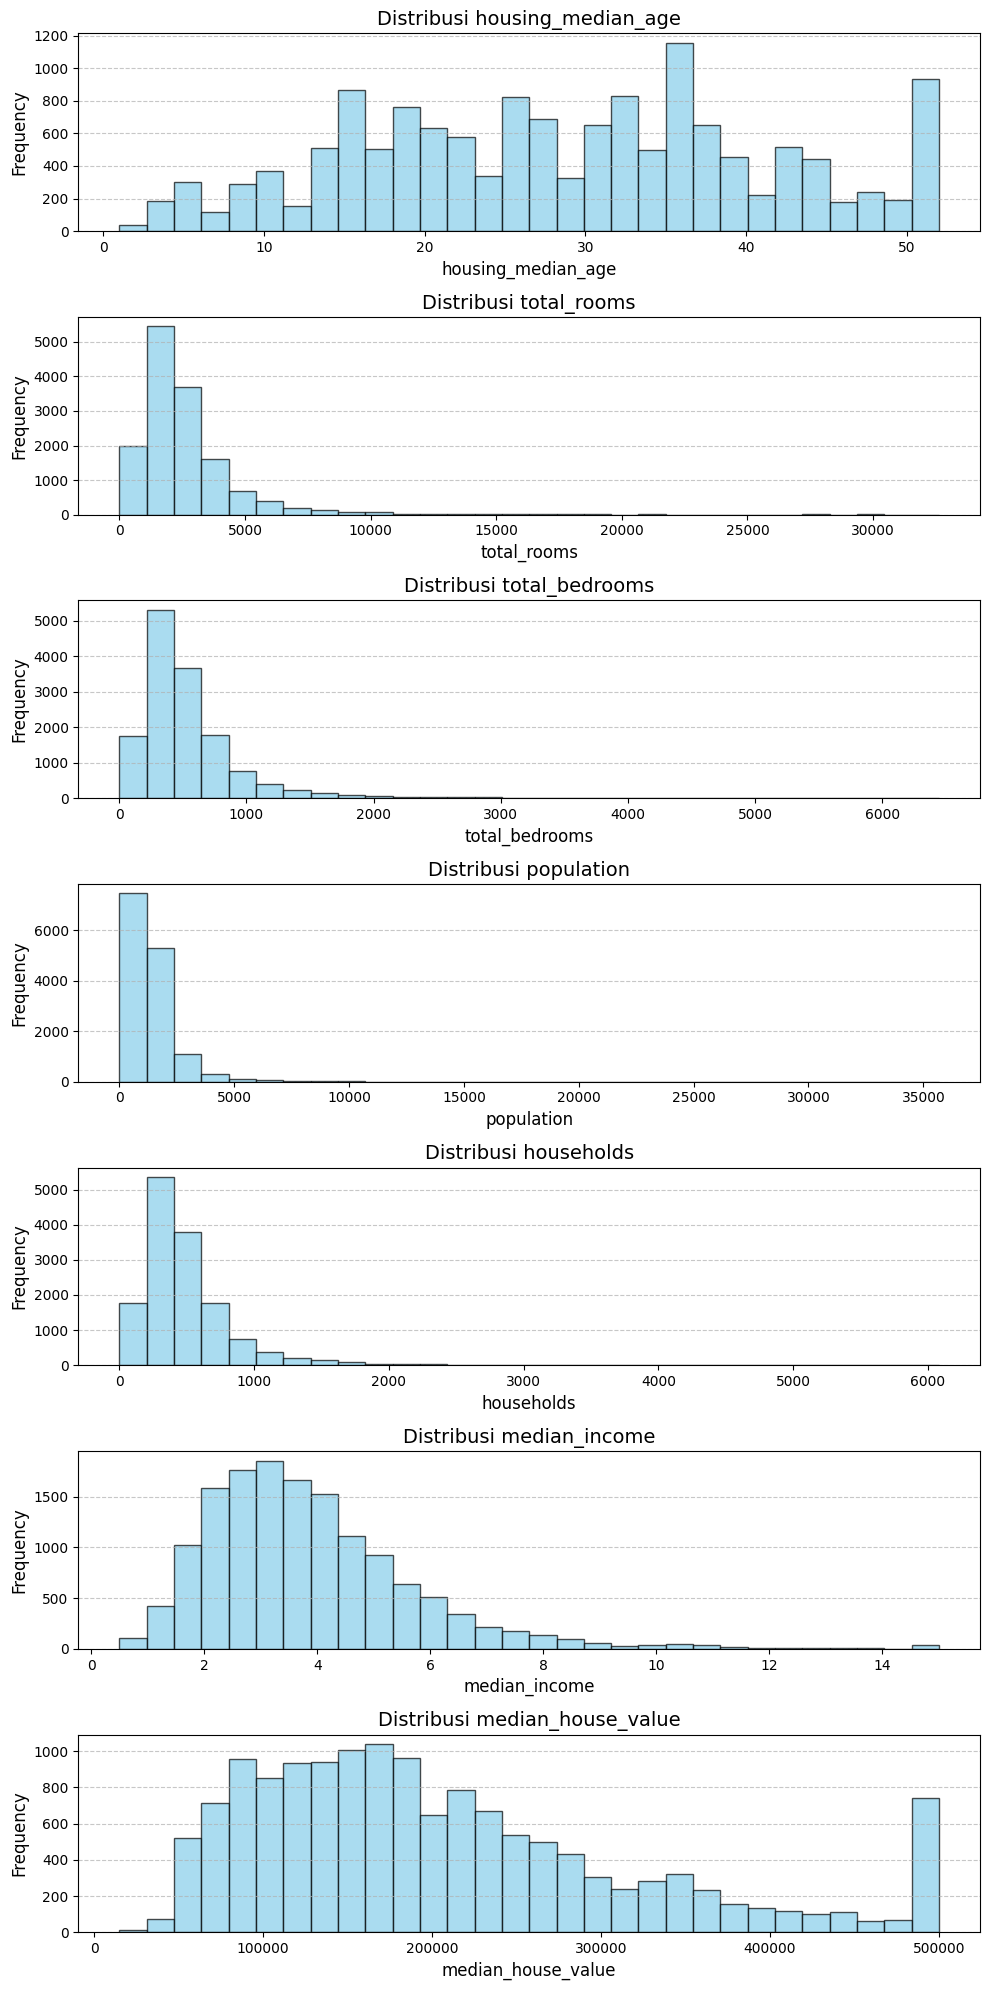

In [701]:
# Pilih kolom numerik kecuali latitude dan longitude
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
columns_to_plot = numeric_columns.drop(['latitude', 'longitude'])

# Plot distribusi untuk setiap kolom
plt.figure(figsize=(10, 20))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribusi {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [702]:
# Melakukan uji Kolmogorov-Smirnov untuk setiap kolom numerik (kecuali latitude dan longitude)
ks_results = {}

for col in columns_to_plot:
    # Uji KS menggunakan distribusi normal sebagai referensi
    stat, p_value = kstest(df[col].dropna(), 'norm', args=(df[col].mean(), df[col].std()))
    ks_results[col] = {'Statistic': stat, 'P-Value': p_value}

# Konversi hasil ke DataFrame
ks_df = pd.DataFrame(ks_results).T
ks_df['Normal Distribution'] = ks_df['P-Value'] > 0.05  # True jika p-value > 0.05

ks_df.reset_index(inplace=True)
ks_df.rename(columns={'index': 'Column'}, inplace=True)

ks_df

,Column,Statistic,P-Value,Normal Distribution
0,housing_median_age,0.060459,2.373285e-46,False
1,total_rooms,0.159517,1.235164e-321,False
2,total_bedrooms,0.150277,1.309831e-282,False
3,population,0.149249,2.093460e-281,False
4,households,0.146260,3.271278e-270,False
5,median_income,0.089329,9.103164e-101,False
6,median_house_value,0.102538,1.045957e-132,False


Terlihat banyak sekali outliers pada beberapa fitur.

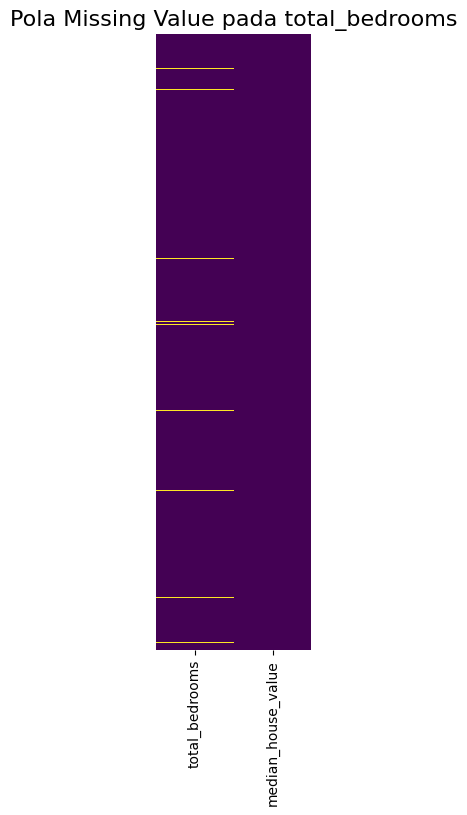

Jumlah missing value pada fitur total_bedrooms: 137


In [749]:
# Sort dataset berdasarkan median_house_value secara descending
sorted_df = df.sort_values(by='median_house_value', ascending=False)

# Visualisasi missing value hanya untuk dua kolom: total_bedrooms dan median_house_value
plt.figure(figsize=(2, 8))
sns.heatmap(sorted_df[['total_bedrooms', 'median_house_value']].isnull(), 
            cbar=False, cmap='viridis', yticklabels=False)
plt.title("Pola Missing Value pada total_bedrooms", fontsize=16)
plt.show()

print('Jumlah missing value pada fitur total_bedrooms:', df['total_bedrooms'].isna().sum())

Tidak terdapat pola tertentu pada missing value pada fitur `total_bedrooms` berdasarkan visualisasi ini (Missing at Random). Jumlah missing value pada fitur `total_bedroom` ada 137 data atau 0.95%.

### Preproccesing

**Missing Value**

Dikarenakan jumlah missing value yang tidak mencapai 1% maka saya memutuskan untuk menghapus missing value.

In [704]:
df_preprocces = df.dropna()
df_preprocces['total_bedrooms'].isna().sum()

np.int64(0)

In [705]:
df_preprocces.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


**Penanganan Outliers**

Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [706]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

**Penanganan Outliers Pada Fitur Target**

In [707]:
find_anomalies(df_preprocces['median_house_value'])

IQR: 144350.0
limit_bawah: -97125.0
limit_atas: 480275.0


In [708]:
df_preprocces[df_preprocces['median_house_value'] > 480275].count()['median_house_value']

np.int64(751)

In [709]:
df_preprocces = df_preprocces[(df_preprocces['median_house_value'] <= 480275)]

**Penanganan Outliers Pada Fitur Median Income**

In [710]:
find_anomalies(df_preprocces['median_income'])

IQR: 2.03795
limit_bawah: -0.5331249999999996
limit_atas: 7.618675


In [711]:
df_preprocces[df_preprocces['median_income']  > 7.618675].count()['median_income']

np.int64(232)

In [712]:
df_preprocces = df_preprocces[(df_preprocces['median_income'] <= 7.618675)]

**Penanganan Outliers Pada Fitur Population**

In [713]:
find_anomalies(df_preprocces['population'])

IQR: 950.0
limit_bawah: -630.0
limit_atas: 3170.0


In [714]:
df_preprocces[df_preprocces['population']  > 3170.0].count()['population']

np.int64(758)

In [715]:
df_preprocces = df_preprocces[(df_preprocces['population'] <= 3170)]

**Penanganan Outliers Pada Fitur Total Rooms**

In [716]:
find_anomalies(df_preprocces['total_rooms'])


IQR: 1489.75
limit_bawah: -837.625
limit_atas: 5121.375


In [717]:
# Cek price > $321.5
df_preprocces[df_preprocces['total_rooms']  > 5121.375].count()['total_rooms']

np.int64(456)

In [718]:
# Melakukan filtering pada data
df_preprocces = df_preprocces[(df_preprocces['total_rooms'] <= 5121.375)]

**Penanganan Outliers Pada Fitur Households**

In [719]:
find_anomalies(df_preprocces['households'])

IQR: 270.0
limit_bawah: -135.0
limit_atas: 945.0


In [720]:
df_preprocces[df_preprocces['households']  > 945].count()['households']

np.int64(216)

In [721]:
# Melakukan filtering pada data
df_preprocces = df_preprocces[(df_preprocces['households'] <= 945)]

**Penanganan Outliers Pada Fitur Total Bedrooms**

In [722]:
find_anomalies(df_preprocces['total_bedrooms'])

IQR: 282.0
limit_bawah: -140.0
limit_atas: 988.0


In [723]:
df_preprocces[df_preprocces['total_bedrooms']  > 988].count()['total_bedrooms']

np.int64(70)

In [724]:
# Melakukan filtering pada data
df_preprocces = df_preprocces[(df_preprocces['total_bedrooms'] <= 988)]

In [725]:
len(df_preprocces)

11828

Setelah kita melakukan preproccesing, data yang tersisa sejumlah 11.828 dari yang sebelumnya 14.448 data, itu artinya kita kehilangan data sebesar 2.620 atau 18.13% data.
Selanjutnya kita akan melakukan pemodelan dengan data yang sudah dibersihkan.

### Model

In [726]:
# model
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from scipy.stats import randint, uniform

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [727]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['ocean_proximity']),
], remainder='passthrough', force_int_remainder_cols=False)

**Data Splitting**

In [728]:
# Memisahkan data independen variabel dengan target
X = df_preprocces.drop(['median_house_value'], axis=1)
y = df_preprocces['median_house_value']

# Splitting data training dan test dengan proporsi 80:20
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=42)

**Memilih Benchmark Model**

In [729]:

# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_lgbm = TransformedTargetRegressor(lgbm, func=np.log, inverse_func=np.exp)

# # Scaling data
# scaler = StandardScaler()

models = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_lgbm]

# Menyimpan hasil prediksi di setiap fold
mae_score = []
nilai_mean_mae = []
nilai_std_mae = []


medae_score = []
nilai_mean_medae = []
nilai_std_medae = []

r2_scores = []
nilai_mean_r2 = []
nilai_std_r2 = []

for i in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', transformer),
        # ('scaler', scaler),
        ('model', i)
    ])
    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )
    print(model_cv_mae, i)
    
    mae_score.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())
    
    # MedAE
    model_cv_medae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_median_absolute_error', 
        error_score='raise'
        )
    print(model_cv_medae, i)
    
    medae_score.append(model_cv_medae)
    nilai_mean_medae.append(model_cv_medae.mean())
    nilai_std_medae.append(model_cv_medae.std())
    # R2
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
        )
    print(model_cv_r2, i)
    r2_scores.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())

[-42178.15055883 -41218.48214896 -41544.86089664 -40598.15875391
 -40980.48061689] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-28271.37207534 -29322.95276495 -29891.75450418 -28799.39861656
 -28278.17383715] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[0.59876717 0.612283   0.58730137 0.62436145 0.5976556 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-71103.58297039 -69973.90032229 -69207.83642849 -70813.89633789
 -68985.80255344] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-60117.24521801 -56198.92539157 -55778.35361155 -56757.54180178
 -57497.81625857] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
     

In [730]:
# Evaluasi hasil dari 6 kandidat algoritma yang digunakan
df_evaluasi = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'LGBM Regressor'],
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MedAE': nilai_mean_medae,
    'Std_MedAE': nilai_std_medae,
    'Mean_R2': nilai_mean_r2,
    'Std_R2': nilai_std_r2
})

# Urutkan berdasarkan Mean_R2 dari yang terbesar ke terkecil
df_evaluasi_sorted = df_evaluasi.sort_values(by='Mean_R2', ascending=False)

# Tampilkan DataFrame yang sudah diurutkan
df_evaluasi_sorted

,Model,Mean_MAE,Std_MAE,Mean_MedAE,Std_MedAE,Mean_R2,Std_R2
5,LGBM Regressor,-29266.404530,320.739455,-19027.688636,509.246067,0.773980,0.011723
4,XGBoost Regressor,-29353.442111,589.378043,-18776.822656,560.401353,0.769716,0.018020
3,RandomForest Regressor,-30338.362848,460.145939,-19386.503846,805.280859,0.754279,0.013683
0,Linear Regression,-41304.026595,535.227639,-28912.730360,625.078749,0.604074,0.012881
2,DecisionTree Regressor,-43134.351018,1548.476067,-26730.000000,998.799279,0.510692,0.047032
1,KNN Regressor,-70017.003722,840.913523,-57269.976456,1535.807849,0.057351,0.020292


Berdasarkan Mean_R², model LightGBM adalah yang terbaik dengan nilai R² sebesar 0.77398, diikuti oleh XGBoost dengan nilai R² sebesar 0.769716. Model LightGBM juga memiliki nilai Mean_MAE paling rendah di antara semua model, yaitu -29266.404530, dan nilai Mean_MedAE sebesar -19027.688636, yang menunjukkan tingkat error prediksi yang lebih kecil dibanding model lain.

- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu LGBM dan XGBoost

**Predik ke Test Set Dengan Benchmark Model**

Prediksi pada test set dengan menggunakan model LGBM dan XGBoost

In [731]:
models = {
    'LGBM': LGBMRegressor(random_state=42),
    'XGB': XGBRegressor(random_state=42)
}

mae_score = []
medae_score = []
r2_scores = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        # ('scaler', scaler),
        ('model', models[i])
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae_score.append(mean_absolute_error(y_test, y_pred))
    medae_score.append(median_absolute_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE':mae_score, 'MedAE':medae_score, 'R2':r2_scores}, index=models.keys())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1843
[LightGBM] [Info] Number of data points in the train set: 9462, number of used features: 11
[LightGBM] [Info] Start training from score 185394.726062


In [732]:
score_before_tuning.sort_values(by='R2', ascending=False)

,MAE,MedAE,R2
XGB,28385.786824,19183.511719,0.788145
LGBM,28837.912506,19486.123338,0.785492


Ketika dilakukan prediksi pada test set, performa XGBoost secara keseluruhan sedikit lebih baik dibandingkan dengan LightGBM. Hal ini dapat dilihat dari nilai MAE sebesar 28385.79 dan MedAE sebesar 19183.51, yang lebih rendah dibandingkan dengan LightGBM yang memiliki MAE sebesar 28837.91 dan MedAE sebesar 19486.12. Selain itu, nilai R-squared untuk XGBoost juga lebih tinggi, yaitu 0.7881, dibandingkan dengan LightGBM yang memiliki nilai R-squared sebesar 0.7855.

Meskipun perbedaannya tidak terlalu signifikan, XGBoost dapat dianggap sebagai model terbaik berdasarkan evaluasi pada test set, karena menunjukkan performa yang sedikit lebih unggul dibandingkan LightGBM.

**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari LGBM, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [733]:
# Kedalaman pohon
max_depth = list(np.arange(3, 11))

# Learning rate
learning_rate = list(np.arange(1, 11)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 501, 50))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(5, 9)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(0, 6)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(6, 9)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 0, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [734]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=42, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        # ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=10, shuffle=True, random_state=42)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_median_absolute_error', 'r2'], 
    n_jobs = -1,
    refit = 'neg_median_absolute_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42  
)

In [735]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['ocean_proximity'])])),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=No...
                                                             np.float64(0.021544346900318832),
                                                             np.float64(0.046415888336127774),
                                                             np.float64(0.1),
                                                             np.float64(0.21544346900318823),
                                                             np.float64(0.46415888336127775),
                                                             np.float64(1.0)],
                                        'model__subsample': [np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8)]},
                   random_state=42, refit='neg_median_absolute_error',
                   scoring=['neg_mean_absolute_error',
                            'neg_median_absolute_error', 'r2'])

In [736]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_median_absolute_error', 'rank_test_r2']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,split3_test_r2,split4_test_r2,split5_test_r2,split6_test_r2,split7_test_r2,split8_test_r2,split9_test_r2,mean_test_r2,std_test_r2,rank_test_r2
27,5.589450,0.101275,0.064850,0.004776,0.8,0.010000,500,9,0.03,3,...,0.806255,0.779354,0.802268,0.773672,0.821343,0.777888,0.807570,0.800860,0.017718,1
17,1.533326,0.094382,0.017884,0.004896,0.8,0.002154,400,7,0.07,3,...,0.795874,0.772727,0.803001,0.771827,0.819971,0.769605,0.803403,0.798225,0.019959,2
47,3.348495,0.242266,0.029421,0.015941,0.6,0.002154,350,9,0.03,2,...,0.805580,0.778351,0.799068,0.769273,0.814897,0.772076,0.804781,0.797423,0.018008,3
29,4.687570,0.220736,0.046468,0.008347,0.5,1.000000,500,9,0.02,2,...,0.800170,0.779590,0.799349,0.768268,0.815055,0.767533,0.804877,0.795752,0.017790,4
11,1.000176,0.039259,0.013363,0.001961,0.7,0.004642,350,6,0.10,2,...,0.797506,0.779358,0.798522,0.777423,0.812452,0.766327,0.798160,0.795144,0.016691,5


In [737]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -18391.7625
Best_params: {'model__subsample': np.float64(0.8), 'model__reg_alpha': np.float64(0.01), 'model__n_estimators': np.int64(500), 'model__max_depth': np.int64(9), 'model__learning_rate': np.float64(0.03), 'model__gamma': np.int64(3), 'model__colsample_bytree': np.float64(0.7)}


In [738]:
model = {'XGB': XGBRegressor(random_state=42)}

xgb_tuning = random_xgb.best_estimator_

xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
medae_xgb_tuning = median_absolute_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning= r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MedAE': medae_xgb_tuning, 'R2': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MedAE,R2
XGB,27032.549685,17463.890625,0.803881


In [739]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,MAE,MedAE,R2
XGB,28385.786824,19183.511719,0.788145


Model XGBoost menunjukkan peningkatan performa setelah dilakukan hyperparameter tuning pada test set.

Sebelum tuning:

- MAE: 28385.79
- MedAE: 19183.51
- R²: 0.7881

Setelah tuning:

- MAE: 27032.55
- MedAE: 17463.89
- R²: 0.8039

Setelah dilakukan hyperparameter tuning, nilai MAE dan MedAE menurun, menunjukkan bahwa model menjadi lebih presisi dalam memprediksi nilai pada test set. Selain itu, peningkatan pada nilai R² dari 0.7881 menjadi 0.8039 menunjukkan bahwa model mampu menjelaskan variabilitas data target dengan lebih baik. Hal ini membuktikan bahwa tuning memberikan dampak positif pada performa model.

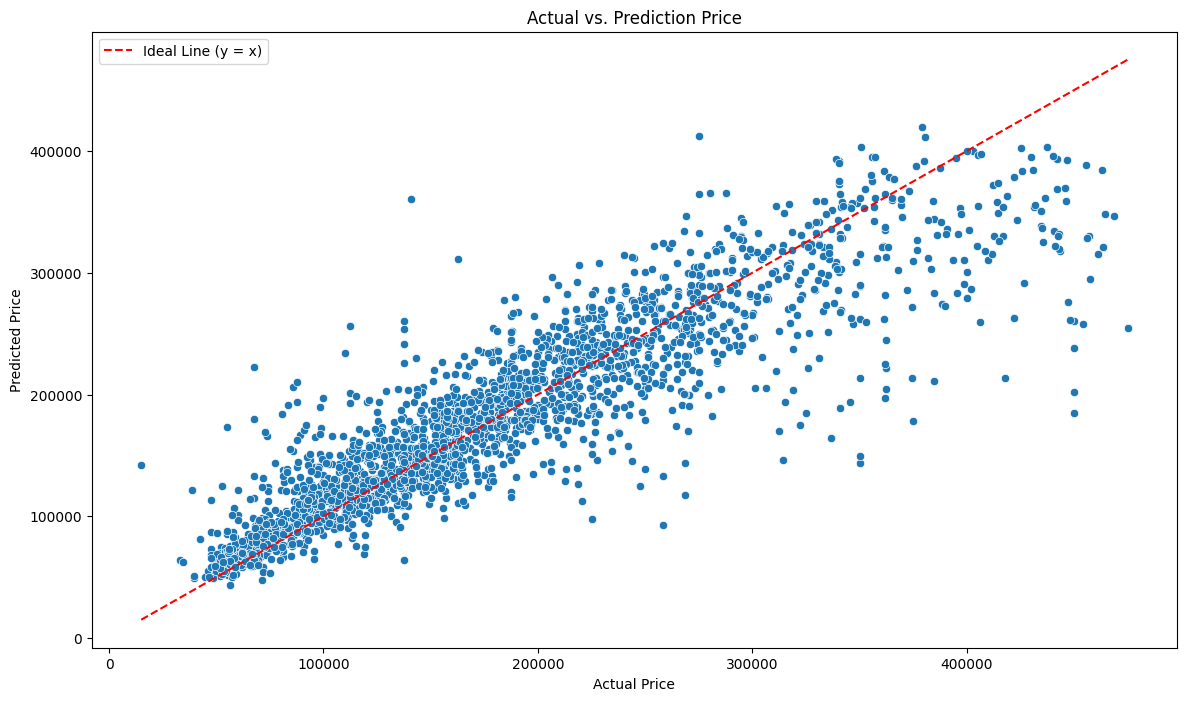

In [758]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');
# Tambahkan garis diagonal (y = x)
max_val = max(max(y_test), max(y_pred_xgb_tuning))  # Nilai maksimum dari data
min_val = min(min(y_test), min(y_pred_xgb_tuning))  # Nilai minimum dari data
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line (y = x)')
# Tambahkan legenda
plt.legend()

# Tampilkan plot
plt.show()

Berdasarkan plot di atas, terlihat bahwa model prediksi cukup baik dalam mendekati nilai aktual, yang ditunjukkan dengan banyaknya titik prediksi yang berdekatan dengan garis ideal (y = x). Namun, terdapat beberapa outlier di mana model melakukan overestimation (prediksi lebih tinggi dari aktual) dan underestimation (prediksi lebih rendah dari aktual), terutama pada nilai rumah dengan harga yang lebih ekstrem (sangat rendah atau sangat tinggi).

Meskipun demikian, secara keseluruhan model memiliki kemampuan yang baik untuk menangkap pola dalam data, dengan nilai evaluasi metrik seperti MAE dan MedAE yang cukup rendah setelah tuning. Visualisasi ini mengonfirmasi bahwa model ini layak digunakan untuk memprediksi nilai rumah dengan tingkat akurasi yang memadai.

**Explain AI**

In [741]:
# Best Model : XGB tuned with hyperparameter
model_best = random_xgb.best_estimator_

model_best['model']

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=np.float64(0.7), device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=np.int64(3),
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=np.float64(0.03),
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=np.int64(9), max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=np.int64(500), n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [742]:
# Pipeline
model_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['ocean_proximity'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=np.float64(0.7), device=None,
                              early_stoppi...
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None,
                              learning_rate=np.float64(0.03), max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=np.int64(9),
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=np.int64(500),
                              n_jobs=None, num_parallel_tree=None,
                              random_state=42, ...))])

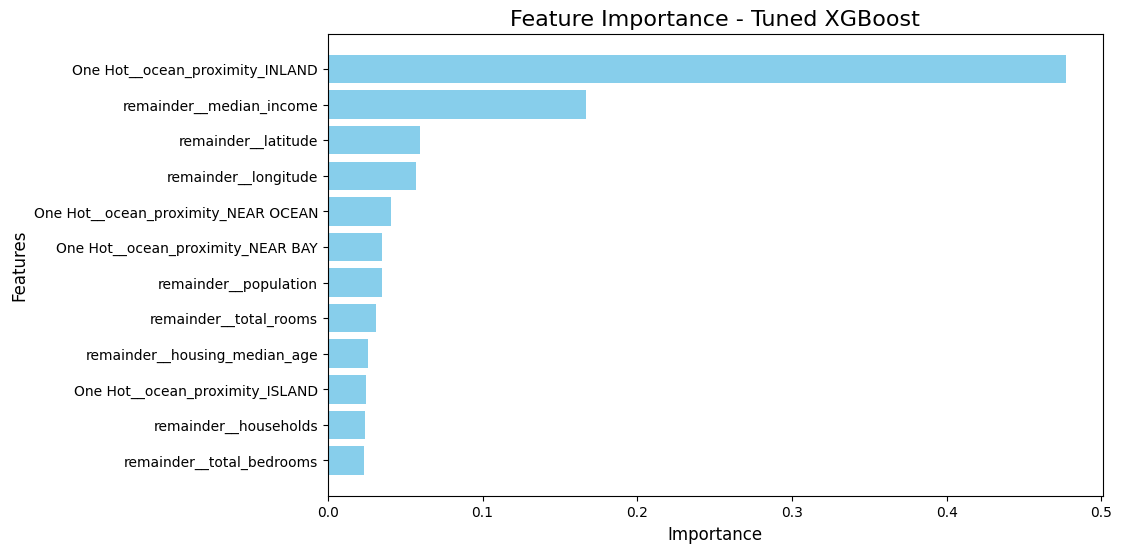

,Feature,Importance
0,One Hot__ocean_proximity_INLAND,0.477038
11,remainder__median_income,0.166626
5,remainder__latitude,0.059625
4,remainder__longitude,0.056939
3,One Hot__ocean_proximity_NEAR OCEAN,0.041014
2,One Hot__ocean_proximity_NEAR BAY,0.035147
9,remainder__population,0.034943
7,remainder__total_rooms,0.030871
6,remainder__housing_median_age,0.025912
1,One Hot__ocean_proximity_ISLAND,0.024403


In [762]:
# Mengakses model XGBoost dari pipeline
best_model = xgb_tuning.named_steps['model']

# Mendapatkan feature importance dari model
feature_importance = best_model.feature_importances_

# Nama kolom setelah transformasi
feature_names = transformer.get_feature_names_out()

# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Membalikkan sumbu Y agar fitur terpenting di atas
plt.title('Feature Importance - Tuned XGBoost', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

# Menampilkan DataFrame
importance_df

Berdasarkan visualisasi Feature Importance untuk model XGBoost yang telah dituning, berikut adalah beberapa poin penting:

- ocean_proximity_INLAND merupakan fitur yang paling signifikan dengan nilai importance sekitar 47%. Hal ini menunjukkan bahwa lokasi properti, khususnya apakah berada di area daratan (INLAND), sangat memengaruhi prediksi nilai rumah.

- Fitur median_income berada di peringkat kedua dengan nilai importance sekitar 16.6%. Ini menandakan bahwa pendapatan median penduduk di area tersebut juga menjadi faktor utama dalam menentukan nilai rumah.

- Fitur geografis lainnya seperti latitude dan longitude memiliki kontribusi yang cukup besar dalam model, meskipun lebih kecil dibandingkan dua fitur utama.

- Lokasi berdasarkan kategori lain dalam fitur ocean_proximity, seperti NEAR OCEAN dan NEAR BAY, juga memberikan kontribusi meskipun nilainya relatif kecil dibandingkan dengan INLAND.

- Fitur-fitur seperti population, total_rooms, dan housing_median_age memiliki pengaruh yang lebih rendah dalam menentukan prediksi model, namun tetap relevan.

- Fitur dengan kontribusi paling rendah adalah total_bedrooms dan households, yang menunjukkan bahwa variabel ini memiliki pengaruh yang sangat kecil dalam menentukan nilai rumah.

Kesimpulannya, lokasi properti (khususnya apakah berada di INLAND) dan pendapatan median di area tersebut adalah dua faktor utama yang memengaruhi model dalam memprediksi nilai rumah.

### Conclusion and Recomendation

**Conclution**

Prediksi nilai rumah di California dilakukan menggunakan model Machine Learning Regresi dengan algoritma XGBoost Regressor setelah Hyperparameter Tuning.

1. Model Prediksi
Berdasarkan hasil analisis dan pemodelan yang telah dilakukan, model terbaik yang dipilih adalah XGBoost Regressor. Berikut adalah hasil evaluasi model terbaik pada test set:

- MAE (Mean Absolute Error): 27,032.55
- MedAE (Median Absolute Error): 17,463.89
- R-squared (R²): 0.8039

2. Limitasi
- Model ini memiliki batasan untuk memprediksi nilai yang tinggi dikarenakan data yang dilatih kurang merepresentasikan data yang nilainya tinggi sehingga model memiliki keterbatasan dalam belajar nilai yang tinggi.

- Dataset yang digunakan berasal dari sensus tahun 1990, sehingga mungkin tidak merepresentasikan kondisi terkini pasar perumahan di California. Perubahan dalam faktor ekonomi, sosial, dan lingkungan bisa memengaruhi akurasi prediksi jika diterapkan pada data baru.

- Beberapa fitur, seperti `ocean_proximity`, memiliki distribusi yang tidak merata (contohnya, kategori INLAND mendominasi data). Hal ini dapat menyebabkan bias pada model terhadap kategori tertentu.

- Model hanya menggunakan fitur yang tersedia dalam dataset, seperti jumlah kamar, lokasi, dan pendapatan median. Faktor lain seperti kondisi pasar properti, tingkat suku bunga, atau kebijakan pemerintah yang juga memengaruhi harga rumah tidak dimasukkan dalam analisis.

**Recomendation**

1. Meningkatkan Representasi Data untuk Nilai Tinggi
- Gunakan sampling yang lebih seimbang atau oversampling pada nilai rumah yang tinggi untuk memberikan representasi yang lebih baik dalam data pelatihan.
- Cari dataset tambahan yang mencakup properti dengan nilai tinggi untuk melengkapi data yang ada.

2. Menggunakan Dataset yang Lebih Baru
- Carilah dataset sensus atau data pasar perumahan terkini untuk meningkatkan akurasi model dalam merepresentasikan kondisi pasar saat ini.
- Pertimbangkan untuk menggabungkan data eksternal seperti data harga properti terkini dari platform online atau agen properti.

3. Mengatasi Ketidakseimbangan Fitur ocean_proximity
- Terapkan teknik resampling untuk kategori fitur yang underrepresented seperti ISLAND atau NEAR BAY.
- Tambahkan fitur geografis lain, seperti jarak ke pusat kota atau ke landmark penting, untuk memberikan konteks yang lebih kaya.

In [765]:
import pickle

pickle.dump(model_best, open('Model_XGB_data_california_house.pkl', 'wb'))